# Integrating HyperSHAP with CARP-S

## Step 0: Installing CARP-S, benchmark dependencies, and downloading benchmark data

In [ ]:
!uv add carps
!uv run python -m carps.build.make benchmark_bbob benchmark_yahpo benchmark_hpob benchmark_mfpbench

# Wrapping CARP-S Objective Functions

In [3]:
from carps.objective_functions.objective_function import ObjectiveFunction
from carps.utils.trials import TrialInfo
from ConfigSpace import Configuration


class ObjectiveFunctionWrapper:
    def __init__(self, objective_function: ObjectiveFunction):
        self.objective_function = objective_function

    def evaluate(self, config: Configuration) -> float:
        return (-1) * self.objective_function.evaluate(TrialInfo(config=config)).cost

## Convenience Function for Creating ExplanationTasks

In [14]:
from hypershap import ExplanationTask


def explanation_task_from_carps_objective_function(objective_function: ObjectiveFunction) -> ExplanationTask:
    wrapper = ObjectiveFunctionWrapper(objective_function)
    return ExplanationTask.from_function(
        config_space=objective_function.configspace, function=wrapper.evaluate, n_samples=10_000
    )

## HyperSHAP and BBOB

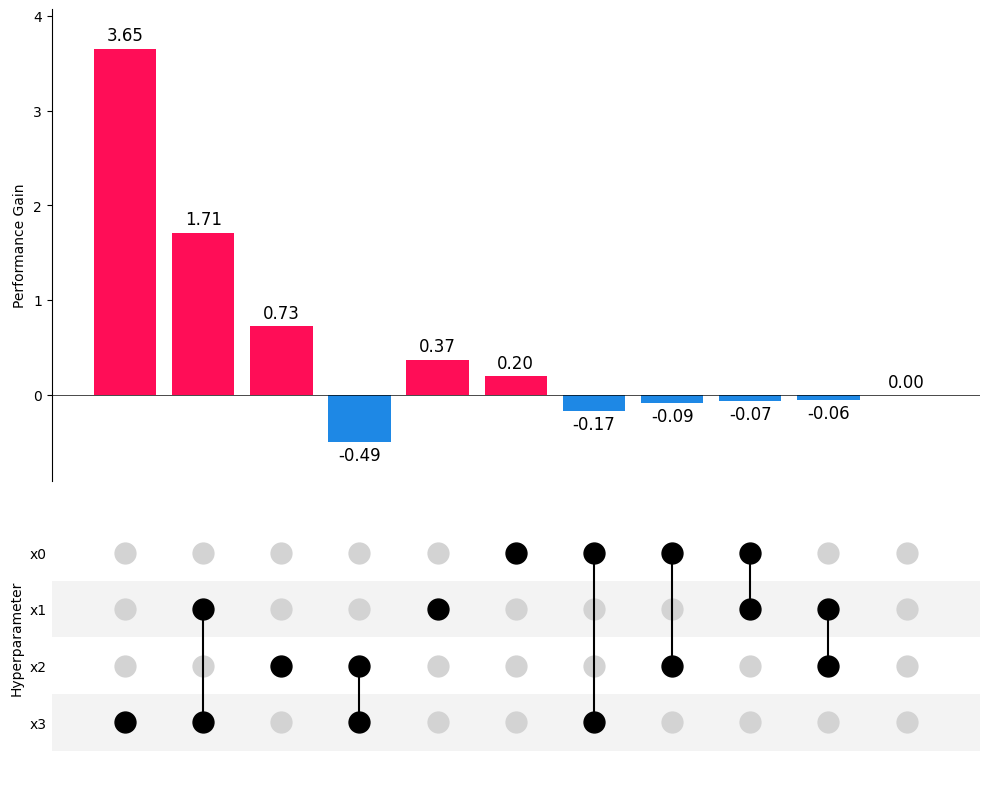

In [19]:
from carps.objective_functions.bbob import BBOBObjectiveFunction
from hypershap import HyperSHAP

print("Instantiate benchmark")
obj = BBOBObjectiveFunction(fid=1, instance=1, dimension=4, seed=42)
baseline = obj.configspace.get_default_configuration()

print("Create explanation task and instantiate HyperSHAP")
hypershap = HyperSHAP(explanation_task_from_carps_objective_function(obj))

print("Tunability")
hypershap.tunability(baseline)

print("Plot results as upset plot")
hypershap.plot_upset()

## HyperSHAP and YAHPO-Gym

Please make sure to also cite:
Zimmer, L., Lindauer, M., & Hutter, F. (2021). Auto-Pytorch: Multi-Fidelity Metalearning for Efficient and Robust AutoDL. IEEE Transactions on Pattern Analysis and Machine Intelligence, 43(9), 3079-3090.
Zimmer, L. (2020). data_2k_lw.zip. figshare. Dataset. https://doi.org/10.6084/m9.figshare.11662422.v1, Apache License, Version 2.0.
Create explanation task and instantiate HyperSHAP
Tunability


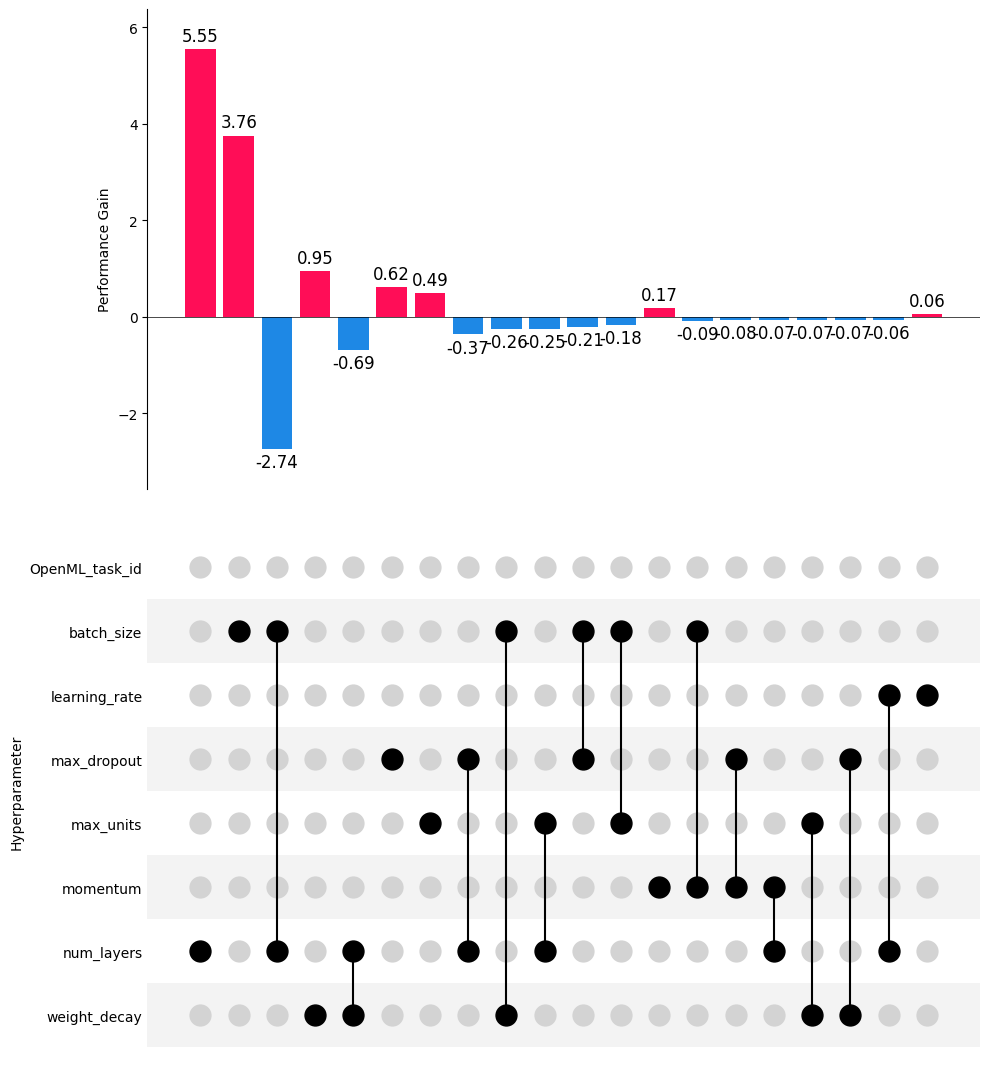

In [18]:
from carps.objective_functions.yahpo import YahpoObjectiveFunction

print("Instantiate benchmark")
obj = YahpoObjectiveFunction(bench="lcbench", instance="3945", seed=42, metric="val_accuracy")
baseline = obj.configspace.get_default_configuration()

print("Create explanation task and instantiate HyperSHAP")
hypershap = HyperSHAP(explanation_task_from_carps_objective_function(obj))

print("Tunability")
hypershap.tunability(baseline)

print("Plot results as upset plot")
hypershap.plot_upset()

## HyperSHAP and PD1

In [15]:
from carps.objective_functions.mfpbench import MFPBenchObjectiveFunction

print("Instantiate benchmark")
obj = MFPBenchObjectiveFunction(benchmark_name="pd1", benchmark="cifar100_wideresnet_2048", metric="valid_error_rate")
baseline = obj.configspace.get_default_configuration()

print("Create explanation task and instantiate HyperSHAP")
hypershap = HyperSHAP(explanation_task_from_carps_objective_function(obj))

print("Tunability")
hypershap.tunability(baseline)

print("Plot results as upset plot")
hypershap.plot_upset()

{'datadir': PosixPath('/Users/wever/PycharmProjects/HyperSHAP-automl/.venv/lib/python3.12/site-packages/carps/task_data/MFPBench/pd1')}


## HyperSHAP and HPO-Bench

In [ ]:
from carps.objective_functions.hpo_bench import HPOBenchObjectiveFunction

obj = HPOBenchObjectiveFunction(model="lr", task_id=10101, metric="function_value", seed=42)
baseline = obj.configspace.get_default_configuration()

print("Create explanation task and instantiate HyperSHAP")
hypershap = HyperSHAP(explanation_task_from_carps_objective_function(obj))

print("Tunability")
hypershap.tunability(baseline)
hypershap.plot_upset()

## HyperSHAP and HPOB

In [ ]:
from carps.objective_functions.hpo_b import HPOBObjectiveFunction

print("Instantiate benchmark")
obj = HPOBObjectiveFunction(model_id="124", dataset_id="41", seed=42)
baseline = obj.configspace.get_default_configuration()

print("Create explanation task and instantiate HyperSHAP")
hypershap = HyperSHAP(explanation_task_from_carps_objective_function(obj))

print("Tunability")
hypershap.tunability(baseline)

print("Plot results")
hypershap.plot_upset()